The dataset, publicly available on Kaggle, pertains to an ongoing cardiovascular study conducted in Framingham, Massachusetts. Its primary aim is to predict whether patients face a 10-year risk of coronary heart disease (CHD). This dataset encompasses over 4,000 records and comprises 15 attributes.

The attributes are classified into several categories:

Demographic:
Sex: male or female (Nominal)
Age: Age of the patient (Continuous, though recorded in whole numbers)

Behavioral:
Current Smoker: Indicates if the patient is currently a smoker (Nominal)
Cigs Per Day: Average number of cigarettes smoked per day (Continuous, as it can take any numerical value)

Medical history:
BP Meds: Indicates if the patient was using blood pressure medication (Nominal)
Prevalent Stroke: Indicates if the patient had previously experienced a stroke (Nominal)
Prevalent Hyp: Indicates if the patient was hypertensive (Nominal)
Diabetes: Indicates if the patient had diabetes (Nominal)

Medical:
Tot Chol: Total cholesterol level (Continuous)
Sys BP: Systolic blood pressure (Continuous)
Dia BP: Diastolic blood pressure (Continuous)
BMI: Body Mass Index (Continuous)
Heart Rate: Heart rate (Continuous)
Glucose: Glucose level (Continuous)

Predicted Variable:
10-year risk of coronary heart disease CHD (binary: “1” signifies “Yes”, “0” signifies “No”)






Import libraries

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [51]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading data

In [52]:
# Replace with the path to your CSV file
csv_path = '/content/drive/MyDrive/Colab Notebooks/framingham.csv'

# Read CSV file into a DataFrame
df = pd.read_csv(csv_path)

Take a first look at the data

In [53]:
df.shape

(4238, 16)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [55]:
#Detect missing values.
df.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [56]:
df.shape[0]


4238

In [9]:
# Calculate the percentage of missing values for each column
percentage_missing = (df.isnull().sum() / df.shape[0]) * 100
print(percentage_missing)

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64


This dataset is quite complete. Only 9% cells in Glucose column are empty.
Dealing with missing values it's an importat part in the data analysis proces. It is important to take time to go through it.

Later we will address this.






In [10]:
# Specify the columns for which you want to calculate mean and standard deviation, minimun and maximun values and percentiles
columns_to_analyze = df.columns

# Calculate mean and standard deviation for specified columns
for column in columns_to_analyze:
    column_mean = df[column].mean()
    column_std = df[column].std()
    column_max = df[column].max()
    column_min = df[column].min()
    column_25th_percentile = df[column].quantile(0.25)
    column_75th_percentile = df[column].quantile(0.75)


    print(f"Column: {column}")
    print(f"Mean: {column_mean:.2f}")
    print(f"Standard Deviation: {column_std:.2f}")
    print(f"Max value: {column_max:.2f}")
    print(f"Minimun value: {column_min:.2f}")
    print(f"25th percentile: {column_25th_percentile:.2f}")
    print(f"75th percentile: {column_75th_percentile:.2f}")
    print()

Column: male
Mean: 0.43
Standard Deviation: 0.50
Max value: 1.00
Minimun value: 0.00
25th percentile: 0.00
75th percentile: 1.00

Column: age
Mean: 49.58
Standard Deviation: 8.57
Max value: 70.00
Minimun value: 32.00
25th percentile: 42.00
75th percentile: 56.00

Column: education
Mean: 1.98
Standard Deviation: 1.02
Max value: 4.00
Minimun value: 1.00
25th percentile: 1.00
75th percentile: 3.00

Column: currentSmoker
Mean: 0.49
Standard Deviation: 0.50
Max value: 1.00
Minimun value: 0.00
25th percentile: 0.00
75th percentile: 1.00

Column: cigsPerDay
Mean: 9.00
Standard Deviation: 11.92
Max value: 70.00
Minimun value: 0.00
25th percentile: 0.00
75th percentile: 20.00

Column: BPMeds
Mean: 0.03
Standard Deviation: 0.17
Max value: 1.00
Minimun value: 0.00
25th percentile: 0.00
75th percentile: 0.00

Column: prevalentStroke
Mean: 0.01
Standard Deviation: 0.08
Max value: 1.00
Minimun value: 0.00
25th percentile: 0.00
75th percentile: 0.00

Column: prevalentHyp
Mean: 0.31
Standard Deviation

To gain a clearer visualization of the distribution of the data, we will create histograms for all variables.

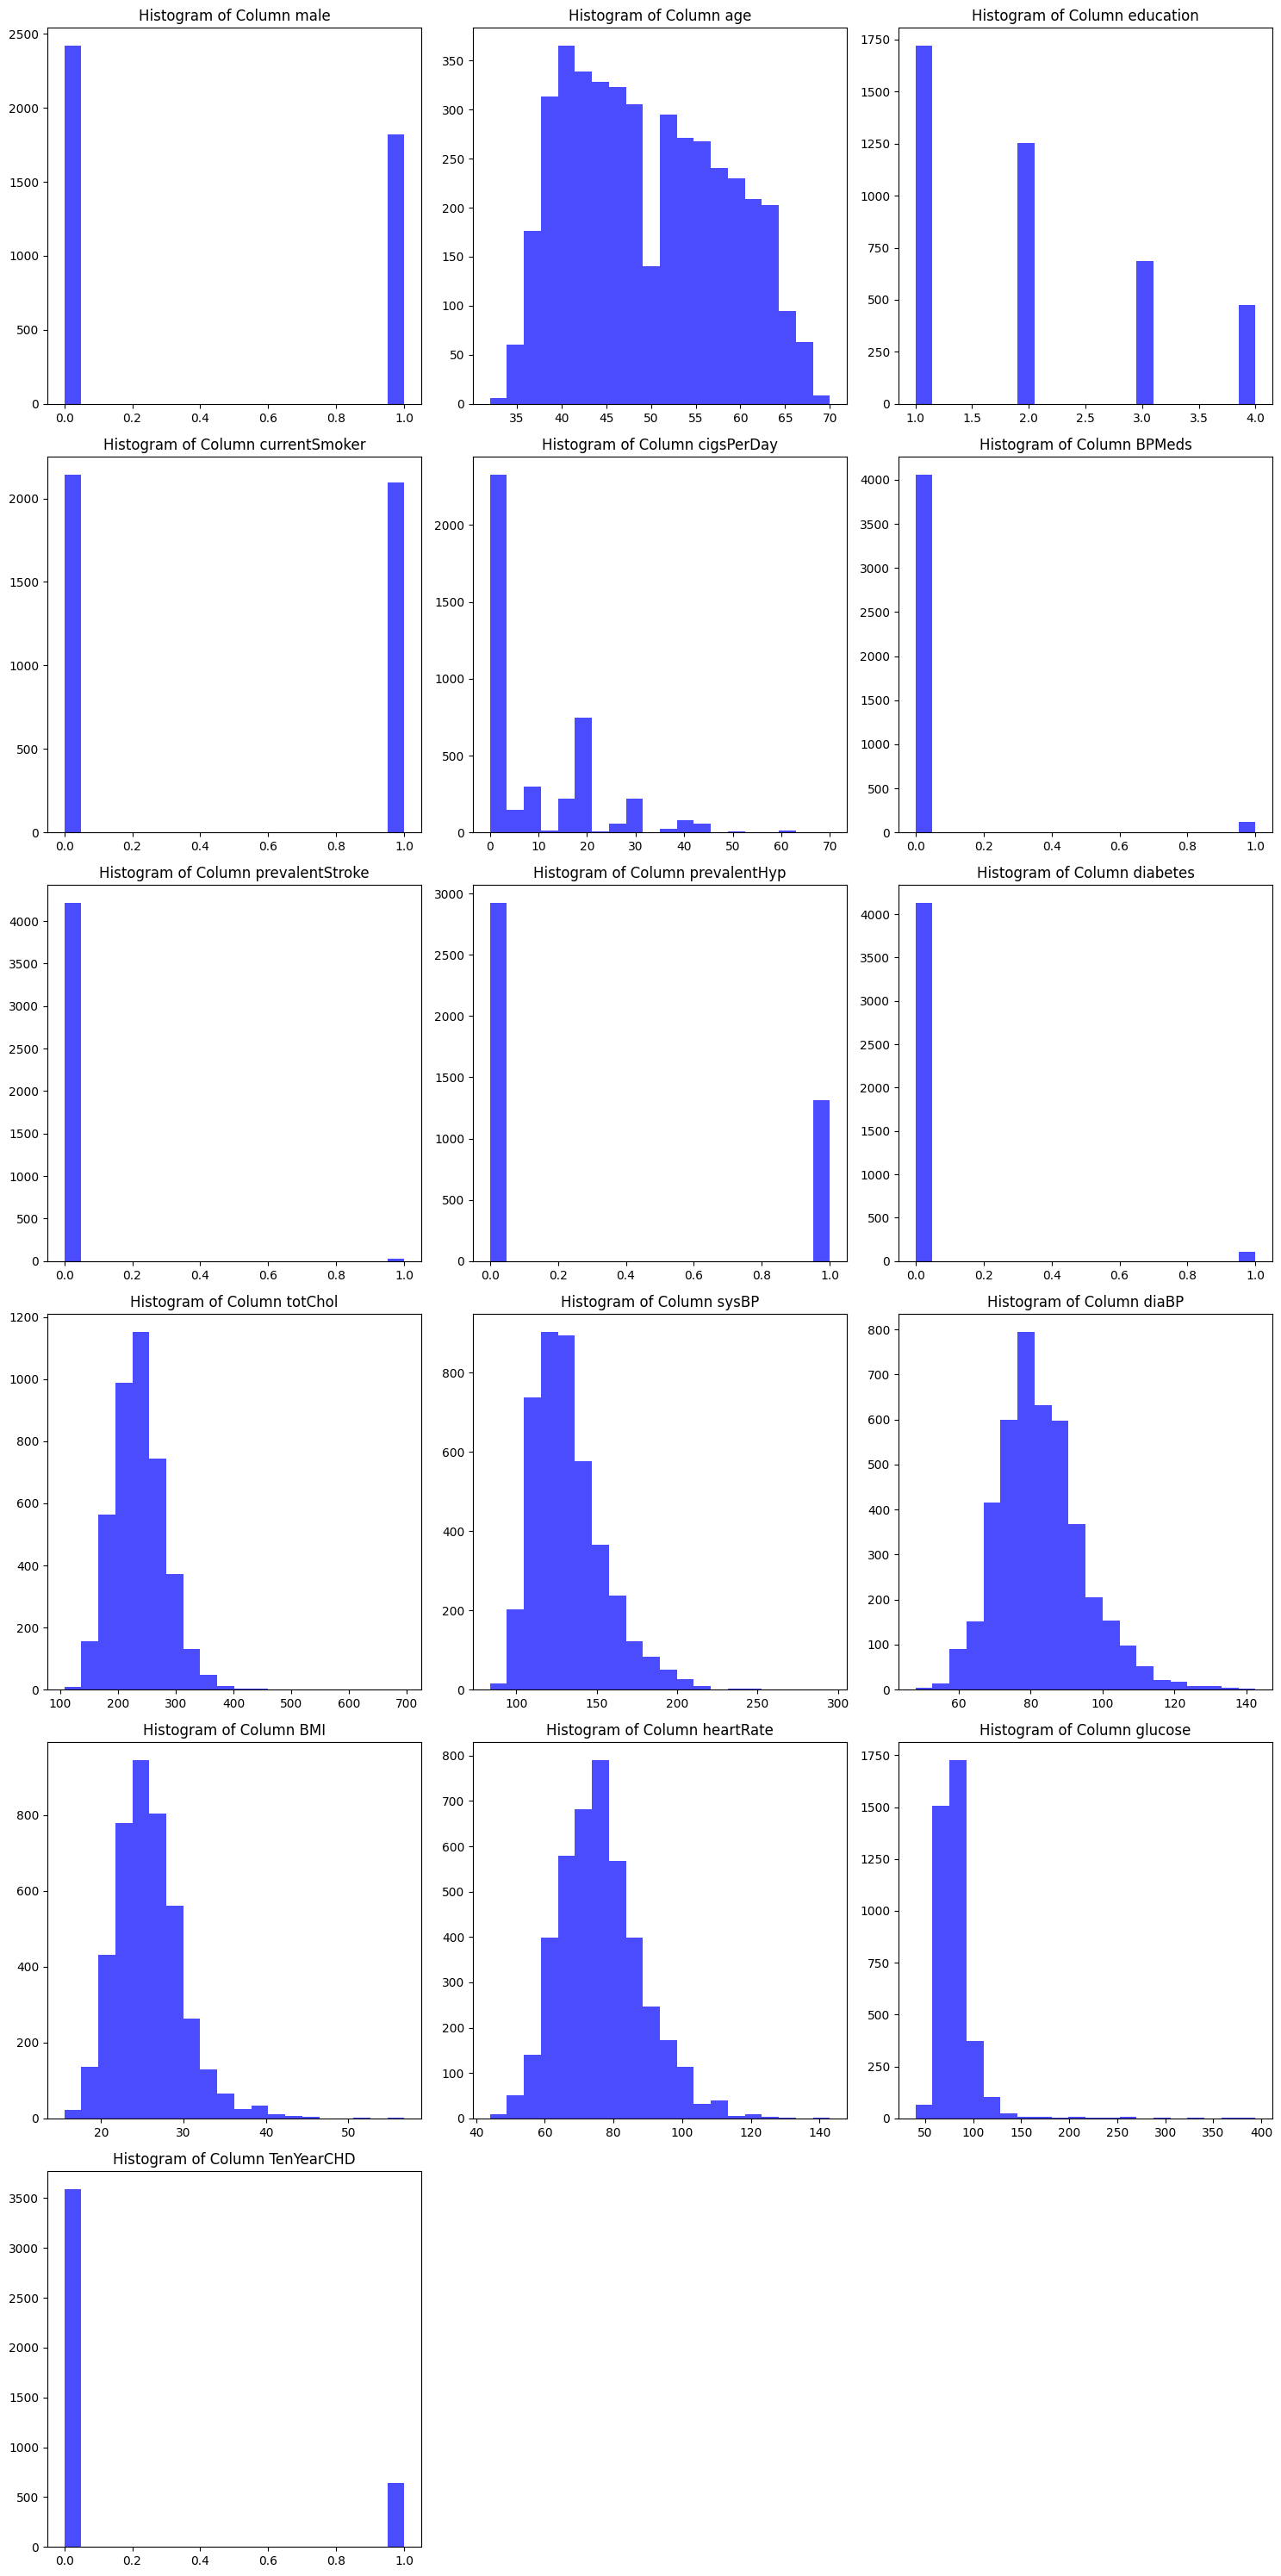

In [11]:
#Function to have all the istograms of the dta set to have a quick look of how it is.


def plot_histograms(data):
    num_columns = len(data.columns)
    num_rows = (num_columns + 2) // 3  # Calculate the number of rows for subplots

    plt.figure(figsize=(15, 5 * num_rows))

    for i, column in enumerate(data.columns):
        plt.subplot(num_rows, 3, i + 1)
        plt.hist(data[column], bins=20, color='blue', alpha=0.7)
        plt.title(f'Histogram of Column {column}')

    plt.tight_layout()
    plt.show()


plot_histograms(df)

The continuous columns display a normal distribution shape, except for the age column.
Next step, we are going to check normality using shapiro wilk test. Usually, data is not perfect and things that are normally distributed in reality are not in our sample colection. For this reason, the normality test is carried on on residuals.

In [12]:
# Perform Shapiro-Wilk test for normality

# Specify the columns to calculate mean and standard deviation. It Should be continous variable.
columns_to_analyze = ['age','totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
for column in columns_to_analyze:
    statistic, p_value = stats.shapiro(df[column])

    alpha = 0.05  # Significance level

    print(f"Column: {column}")
    print(f"Statistic: {statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value > alpha:
        print("Normally distributed (fail to reject H0)\n")
    else:
        print("The data does not look normally distributed (reject H0)\n")

Column: age
Statistic: 0.9670
P-value: 0.0000
The data does not look normally distributed (reject H0)

Column: totChol
Statistic: nan
P-value: 1.0000
Normally distributed (fail to reject H0)

Column: sysBP
Statistic: 0.9352
P-value: 0.0000
The data does not look normally distributed (reject H0)

Column: diaBP
Statistic: 0.9737
P-value: 0.0000
The data does not look normally distributed (reject H0)

Column: BMI
Statistic: nan
P-value: 1.0000
Normally distributed (fail to reject H0)

Column: heartRate
Statistic: nan
P-value: 1.0000
Normally distributed (fail to reject H0)

Column: glucose
Statistic: nan
P-value: 1.0000
Normally distributed (fail to reject H0)



"To address the question of whether there are differences between the values for men and women, we will split the data, assess its normality, and determine if there are significant differences between paired groups of continuous data using a t-test with a significance level of p<0.01. The null hypothesis (H0) posits that there are no significant differences between the groups.  Conversely, the alternative hypothesis (H1) suggests that there are significant differences between the groups.

In [13]:
#split data into male and female
male = df[df['male'] == 0]
female = df[df['male'] == 1]

print(male.shape)
print()
print(female.shape)

(2419, 16)

(1819, 16)


In [14]:
def normality (sex, columns_to_analyze):
  for column in columns_to_analyze:
      residuals = sex[column] - sex[column].mean()

      statistic, p_value = stats.shapiro(residuals)

      alpha = 0.05  # Significance level

      print(f"Column: {column}")
      print(f"Statistic: {statistic:.4f}")
      print(f"P-value: {p_value:.4f}")

      if p_value > alpha:
          print("Normally distributed (fail to reject H0)\n")
      else:
          print("The data does not look normally distributed (reject H0)\n")

In [15]:
columns_to_analyze = ['age','totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

normality(male, columns_to_analyze)

Column: age
Statistic: 0.9681
P-value: 0.0000
The data does not look normally distributed (reject H0)

Column: totChol
Statistic: nan
P-value: 1.0000
Normally distributed (fail to reject H0)

Column: sysBP
Statistic: 0.9349
P-value: 0.0000
The data does not look normally distributed (reject H0)

Column: diaBP
Statistic: 0.9693
P-value: 0.0000
The data does not look normally distributed (reject H0)

Column: BMI
Statistic: nan
P-value: 1.0000
Normally distributed (fail to reject H0)

Column: heartRate
Statistic: 0.9701
P-value: 0.0000
The data does not look normally distributed (reject H0)

Column: glucose
Statistic: nan
P-value: 1.0000
Normally distributed (fail to reject H0)



In [16]:
columns_to_analyze = ['age','totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

normality(female, columns_to_analyze)

Column: age
Statistic: 0.9650
P-value: 0.0000
The data does not look normally distributed (reject H0)

Column: totChol
Statistic: nan
P-value: 1.0000
Normally distributed (fail to reject H0)

Column: sysBP
Statistic: 0.9406
P-value: 0.0000
The data does not look normally distributed (reject H0)

Column: diaBP
Statistic: 0.9775
P-value: 0.0000
The data does not look normally distributed (reject H0)

Column: BMI
Statistic: nan
P-value: 1.0000
Normally distributed (fail to reject H0)

Column: heartRate
Statistic: nan
P-value: 1.0000
Normally distributed (fail to reject H0)

Column: glucose
Statistic: nan
P-value: 1.0000
Normally distributed (fail to reject H0)



To determine if there is a difference between the cholesterol values of males and females, we will conduct a t-test to compare the mean values.

In [17]:
print(male['totChol'].mean())
print()
print(female['totChol'].mean())

239.45959595959596

233.13134657836645


In [18]:
#select columns of interest
columns_to_analyze = ['totChol']

# Initialize a DataFrame to store the results
result_df = pd.DataFrame(columns=['Column', 'Male Mean', 'Female Mean', 'P-Value'])

# Iterate through numerical columns
for column in columns_to_analyze:
    male_mean = male[column].mean()
    # replace NaNs in columns with the male-mean of this column
    male[column].fillna(value=male_mean, inplace=True)

    female_mean = female[column].mean()
    # replace NaNs in columns with the female-mean of this column
    female[column].fillna(value=female_mean, inplace=True)

    t_statistic, p_value = ttest_ind(male[column], female[column])
    result_df = result_df.append({'Column': column, 'Male Mean': male_mean, 'Female Mean': female_mean, 'P-Value': p_value}, ignore_index=True)

# Print the result DataFrame
print(result_df)

    Column   Male Mean  Female Mean   P-Value
0  totChol  239.459596   233.131347  0.000004


<ipython-input-18-a0af7169efaa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male[column].fillna(value=male_mean, inplace=True)
<ipython-input-18-a0af7169efaa>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female[column].fillna(value=female_mean, inplace=True)
<ipython-input-18-a0af7169efaa>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Column': column, 'Male Mean': male_mean, 'Female Mean': female_mean, 'P-Value': p_value}, ignore_index=True)


In this study, the p-value of the t-test is 0.000004. Therefore, we conclude that there is a significant difference between the two groups in this study.

Hypercholesterolemia is the medical term for high cholesterol. Individuals with cholesterol values exceeding 240 are considered hypercholesterolemic. In this study, we aim to determine if the proportion of individuals with hypercholesterolemia significantly differs between men and women. To achieve this, we will utilize the chi-square method to compare proportions between the two groups.

In [19]:
#dividing data into hypercholesterolemic (> 240) and healthy people (< 240)
male_positive = (male['totChol'] > 240).sum()
male_negative = (male['totChol'] < 240).sum()

female_positive = (female['totChol'] > 240).sum()
female_negative = (female['totChol'] < 240).sum()

#getting the percentage of hypercholesterolemic male and female
masc_positive_percentage = male_positive *100 /(male_negative + male_positive)
fem_positive_percentage= female_positive *100 /(female_negative + female_positive)



print('Male hypercholesterolemic:', male_positive, 'male healty:', male_negative)
print('Female hypercholesterolemic:', female_positive, 'female healty:', female_negative)
print()
print('Percentage of hypercholesterolemic male', masc_positive_percentage, "%")
print('Percentage of hypercholesterolemic female', fem_positive_percentage, "%")


Male hypercholesterolemic: 1090 male healty: 1281
Female hypercholesterolemic: 706 female healty: 1076

Percentage of hypercholesterolemic male 45.97216364403205 %
Percentage of hypercholesterolemic female 39.61840628507295 %


Perform chi-square method to compare the two proportions

In [22]:
# Create a 2x2 contingency table
observed = np.array([[male_positive, male_negative],
                     [female_positive, female_negative]])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(observed)

# Interpret the results
if p < 0.05:
    print("p =", p)
    print("There is a significant difference between the proportions of positive cases in the two groups.")

else:
    print("p =", p)
    print("There is no significant difference between the proportions of positive cases in the two groups.")

p = 4.926976838370574e-05
There is a significant difference between the proportions of positive cases in the two groups.


We can conclude that in our data, there is a higher proportion of hypercholesterolemic men compared to women. And this difference is significant.

Next, we will explore the relationship between cholesterol values and blood pressure. This comparison involves categorizing blood pressure into quartiles and assessing their differences using ANOVA.

In [ ]:
#We delete the 50 NaN values in cholesterol column
df.dropna(subset=['totChol'], inplace=True)

In [63]:
# Divide column 'A' into 4 groups using pd.qcut
df['groups'] = pd.qcut(df['sysBP'], q=4)

#get quartiles
Q1 = df[df['groups'] == df['groups'].unique()[0]]  # First quartile
Q2 = df[df['groups'] == df['groups'].unique()[1]]  # Second quartile
Q3 = df[df['groups'] == df['groups'].unique()[2]]  # Third quartile
Q4 = df[df['groups'] == df['groups'].unique()[3]]  # Fourth quartile

print("Q1:",Q1['totChol'].mean(),
      "Q2:",Q2['totChol'].mean(),
      "Q3:",Q3['totChol'].mean(),
      "Q4:",Q4['totChol'].mean())

Q1: 224.77912395153774 Q2: 232.69230769230768 Q3: 249.47081339712918 Q4: 240.29611650485438


In [61]:
#here column_to_analyze will be 'totChol' and 'column_group' wiill be 'sysBP'
# "q" is the number of partitions we want to do in the data set. In this case it will be divided in quartiles.



def perform_anova(df, column_to_analyze, column_group, q):
    # Split the data into 4 groups based on 'column_group'
    df['groups'] = pd.qcut(df[column_group], q=q)

    # Calculate the average of each group
    grouped_avg = df.groupby('groups')[column_to_analyze].mean()

    # Extract data for each group
    groups = [df[df['groups'] == group][column_to_analyze] for group in grouped_avg.index]

    # Perform ANOVA test using f_oneway from scipy.stats
    f_statistic, p_value = f_oneway(*groups)

    return f_statistic, p_value

# Assuming 'df' is your DataFrame
# Replace 'column_to_analyze' and 'column_group' with your specific column names
f_statistic, p_value = perform_anova(df, 'totChol', 'sysBP', 4)

# Print ANOVA results
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)


ANOVA F-Statistic: 61.7441181090325
ANOVA p-value: 4.688407983578945e-39


There is a significative difference bettwen the grops. Now, we conduct post-hoc tests to determine which specific groups differ significantly from each other.

In [65]:
# Generate a Series of group labels (repeating 1, 2, 3, 4) according to your grouping
df['groups'] = pd.qcut(df['sysBP'], q=4, labels=False)

# Perform Tukey's HSD post-hoc test
tukey_result = pairwise_tukeyhsd(df['totChol'], df['groups'])

# Show the results
print(tukey_result.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   7.9132 0.0002  3.0315 12.7948   True
     0      2   15.517    0.0 10.6233 20.4107   True
     0      3  24.6917    0.0  19.816 29.5674   True
     1      2   7.6038 0.0004  2.6723 12.5354   True
     1      3  16.7785    0.0 11.8648 21.6922   True
     2      3   9.1747    0.0   4.249 14.1004   True
----------------------------------------------------


After conducting post-hoc tests, it has been determined that there exists a significant difference among all groups.